In [94]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from pandas.plotting import parallel_coordinates



# Step 1: Loading dataset from UCI repository using URL
wholesale_cust_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

wholesale_cust_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [95]:
# Checking the size of the dataset
print ("Wholesale customers dataset has {} samples with {} features each.".format(*wholesale_cust_data.shape))

Wholesale customers dataset has 440 samples with 8 features each.


In [96]:
# Data Exploration 
wholesale_cust_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [97]:
# Step 2: Data Pre-processing

# check for missing values
print(wholesale_cust_data.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [98]:
# normalizing the data

scaler = StandardScaler()
df_normalized = scaler.fit_transform(wholesale_cust_data)

pd.DataFrame(df_normalized).describe()


,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


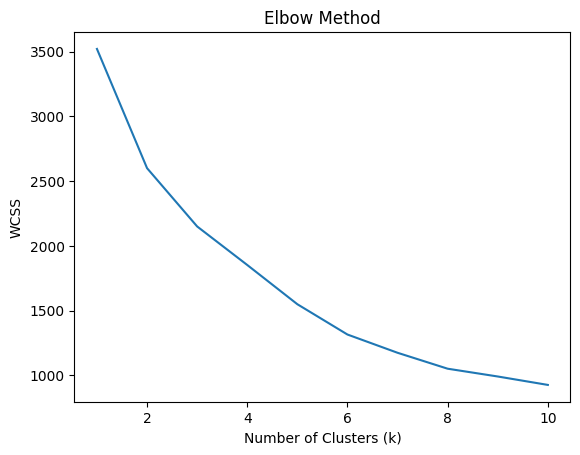

In [99]:
# Step 3: Choosing optimal number of clusters

#Elbow Method

# Initialize a list to store the WCSS values
wcss = []

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


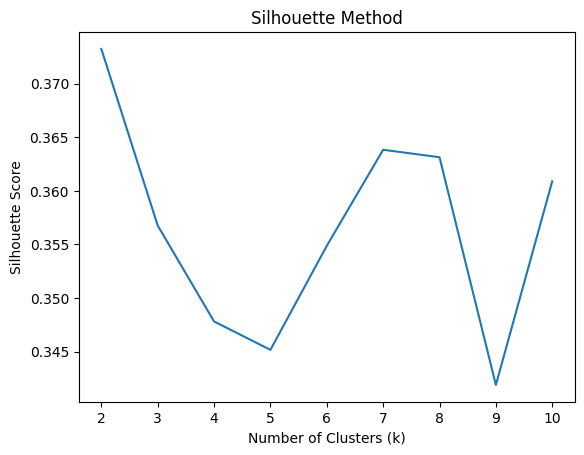

In [100]:
#Silhouette Method

# Initialize an empty list to store the Silhouette scores for different numbers of clusters
silhouette_scores = []

# Try different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_normalized)
    silhouette_scores.append(silhouette_score(df_normalized, kmeans.labels_))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


In [104]:
# Step 3: Applying the K-means clustering algorithm 

# Initialize and fit the K-means model with the chosen number of clusters
num_clusters =  6
kmeans = KMeans(n_clusters=num_clusters,n_init=10 ,random_state=42)

# Fit K-means to the preprocessed dataset
kmeans.fit(df_normalized)

# Add the cluster labels to the original DataFrame
wholesale_cust_data['Cluster'] = kmeans.labels_


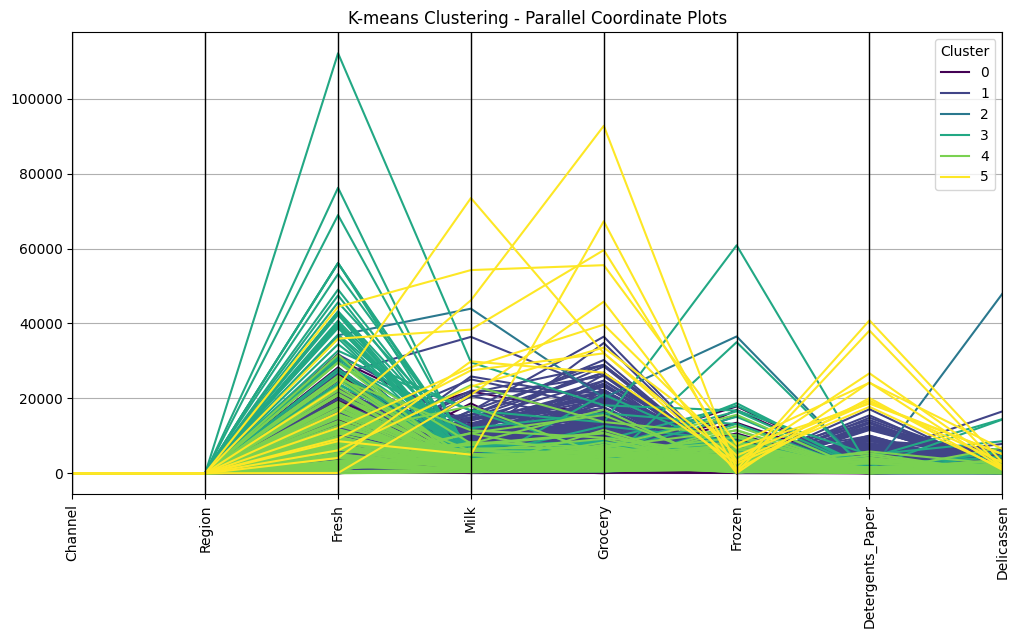

In [102]:
# Step 4: Visualize the results of the clustering algorithm

# Normalize the cluster labels for better visualization
wholesale_cust_data['Cluster'] = wholesale_cust_data['Cluster'].astype('category').cat.codes

sorted_wholesale_cust_data = wholesale_cust_data.sort_values('Cluster')

# Plot parallel coordinate plots for all features
plt.figure(figsize=(12, 6))
parallel_coordinates(sorted_wholesale_cust_data, 'Cluster', colormap='viridis')
plt.xticks(rotation=90)
plt.title('K-means Clustering - Parallel Coordinate Plots')
plt.legend(title='Cluster')
plt.show()


In [105]:
# Step 5: Evaluating the quality of the clustering results using silhouette coefficient

# Calculate the Silhouette Coefficient
silhouette_avg = silhouette_score(df_normalized, kmeans.labels_)
print(f"Silhouette coefficient: {silhouette_avg}")


Silhouette coefficient: 0.354872768644064
